In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as scs
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import pearsonr

In [10]:
master_database=pd.read_csv("/Users/jenniferwu/Documents/kaggle-competition1/cleaned_data/train_spray_weather_v1.csv",float_precision='round_trip')

In [28]:
filtered_master = master_database.drop(columns=['BCFG', 'BR', 'FG', 'FGplus_', 'FU', 'GR', 'SN', 'SQ', 'VCFG'])

In [30]:
#filtered_master.to_csv('/Users/jenniferwu/Documents/kaggle-competition1/cleaned_data/master_db_filtered_codesum.csv')

In [12]:
#master_database['min_spary_dist']=master_database.iloc[:,15:25].min(axis=1)
#master_database['min_spary_days']=master_database.iloc[:,26:34].min(axis=1)

In [87]:
master_database.drop(['AddressNumberAndStreet','Address','NumMosquitos'], axis = 1, inplace = True)

In [88]:
master_database.head()

,Date,Species,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,WnvPresent,year,...,NO_EVENT,RA,SN,SQ,TS,TSRA,VCFG,VCTS,min_spary_dist,min_spary_days
0,2007-05-29,CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,41.867108,-87.654224,8,0,2007,...,0,0,0,0,0,0,0,0,2.725672,1562
1,2007-05-29,CULEX RESTUANS,11,W ROOSEVELT,T048,41.867108,-87.654224,8,0,2007,...,0,0,0,0,0,0,0,0,2.725672,1562
2,2007-05-29,CULEX RESTUANS,11,S PEORIA ST,T091,41.862292,-87.648860,8,0,2007,...,0,0,0,0,0,0,0,0,3.088242,1562
3,2007-05-29,CULEX RESTUANS,11,W CHICAGO,T049,41.896282,-87.655232,8,0,2007,...,0,0,0,0,0,0,0,0,1.941283,1562
4,2007-05-29,CULEX RESTUANS,15,N LONG AVE,T153,41.907645,-87.760886,8,0,2007,...,0,0,0,0,0,0,0,0,0.007932,1562


WnvPresent
0    8153
1     457
Name: WnvPresent, dtype: int64


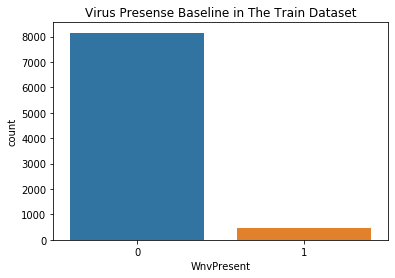

In [114]:
#Baseline
sns.countplot(x = 'WnvPresent', data=master_database)
plt.title('Virus Presense Baseline in The Train Dataset')
print("WnvPresent",master_database.WnvPresent.value_counts(), sep='\n')

In [104]:
master_database.WnvPresent.value_counts()/len(master_database.WnvPresent)

0    0.946922
1    0.053078
Name: WnvPresent, dtype: float64

In [96]:
df = pd.DataFrame()
df['WnvPresence'] = [0,1]
df['pct'] = master_database.WnvPresent.value_counts()/len(master_database.WnvPresent)

WnvPresent = 1 is 5.31 %
WnvPresent = 0 is 94.69 %


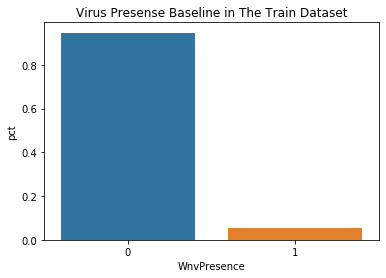

In [111]:
df
sns.barplot(x='WnvPresence',y='pct',data=df)
plt.title('Virus Presense Baseline in The Train Dataset')
print("WnvPresent = 1 is",round(df.pct[1]*100,2),'%')
print("WnvPresent = 0 is",round(df.pct[0]*100,2),'%')

##  Chi Squared Test : CodeSum and other Categorical Vars in Relation to WNV Present

In [15]:
cordf = master_database[['Street', 'Trap','Address','Block','BCFG', 'BR','DZ', 'FG', 'FGplus_', 'FU', 'GR', 'HZ', 'NO_EVENT', 'RA', 'SN', 'SQ',
                'TS', 'TSRA', 'VCFG', 'VCTS','Sunrise_Station','Sunset_Station','WnvPresent']]
cordf = cordf.astype('category')

In [16]:
def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(scs.chi2_contingency(ctsum.fillna(0)))

In [17]:
variable = []
Chi_Squared_Val = []
P_Value = []

for col in cordf.columns[:-1]:
    variable.append(col)
    Chi_Squared_Val.append(chisq_of_df_cols(cordf, col,'WnvPresent')[0])
    P_Value.append(round(chisq_of_df_cols(cordf, col,'WnvPresent')[1],3))

    

chi_square_df = pd.DataFrame({'Variable Name':variable,
             'Chi Squared Value':Chi_Squared_Val,
             'P-value':P_Value})

In [18]:
print('Based on Test, we can drop :',list(chi_square_df['Variable Name'][chi_square_df['P-value'] > .05]))

Based on Test, we can drop : ['BCFG', 'BR', 'FG', 'FGplus_', 'FU', 'GR', 'SN', 'SQ', 'VCFG']


## Correlation Matrix for All Numerical Vars

In [20]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(15, 15))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

In [22]:
alls = set(master_database1.columns)
categoric = set(cordf.columns[:-1])
num_col = list(alls - categoric)

numeric_df = master_database1[num_col]
numeric_df=numeric_df._get_numeric_data()

In [83]:
#heatMap(numeric_df[numeric_df.year == 2011])

In [42]:
d_cor = {}
for col in numeric_df.columns:
    d_cor[col] = pearsonr(numeric_df[col], numeric_df.WnvPresent)[0]

In [57]:
corr_test = pd.DataFrame()

In [60]:
corr_test['Variable']=[i for i in d_cor.keys()]
corr_test['Correlation']=[i for i in d_cor.values()]

In [76]:
corr_test['Correlation']=[pd.to_numeric(i) for i in corr_test.Correlation]
corr_test['Correlation_abs']=[abs(i) for i in corr_test.Correlation]

In [82]:
corr_test=corr_test.sort_values(by=['Correlation_abs'], ascending = False).reset_index(drop=True)
corr_test.drop(columns= ['Correlation_abs'], axis = 1, inplace =True)
corr_test

,Variable,Correlation
0,WnvPresent,1.000000
1,month,0.096551
2,DewPoint_Station,0.091116
3,WetBulb_Station_c,0.088986
4,WetBulb_Station,0.088986
5,Tmin_Station,0.078000
6,Longitude,-0.074075
7,Tavg_Station_c,0.071167
8,Tavg_Station,0.071167
9,Cool_Station,0.067013


## Normalizing Numeric Variables and Conducting VIF Test

In [88]:
def norm_func(i):
        r = (i-min(i))/(max(i)-min(i))
        return(r)

In [89]:
numeric_df = numeric_df.apply(norm_func)

In [90]:
numeric_df_norm = add_constant(numeric_df)
pd.options.display.float_format = "{:.2f}".format
VIF = pd.DataFrame({'Variable_Name' : numeric_df_norm.columns,
              'VIF':[round(variance_inflation_factor(numeric_df_norm.values, i),0)
                       for i in range(numeric_df_norm.shape[1])]})
VIF

,Variable_Name,VIF
0,const,0.00
1,Depart_Station,8.00
2,Cool_Station,6028915163816.00
3,day,1070.00
4,Tavg_Station,5077338926010.00
5,StnPressure_Station,107.00
6,ResultSpeed_Station,7.00
7,AddressAccuracy,1.00
8,WeatherLat_Station,7791694857042.00
9,year,10242875.00


In [91]:
print("Variables without Collinearity to Keep for Model :")
VIF1 = VIF[VIF.VIF <= 10].reset_index(drop=True)
VIF1

Variables without Collinearity to Keep for Model :


,Variable_Name,VIF
0,const,0.00
1,Depart_Station,8.00
2,ResultSpeed_Station,7.00
3,AddressAccuracy,1.00
4,NumMosquitos,1.00
5,AvgSpeed_Station,8.00
6,min_spary_dist,1.00
7,trap_dist_st2,3.00
8,ResultDir_Station,2.00
9,PrecipTotal_Station,2.00


## Filtered Data Frame from ChiSquare Test and VIF 